# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
import scipy.stats as st
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [89]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [90]:
# Set the API base URL
#import json
#from datetime import datetime
#url = # YOUR CODE HE
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | brooks
Processing Record 2 of Set 1 | san carlos del zulia
Processing Record 3 of Set 1 | ballina
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | bowen
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | la ronge
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | lionel town
Processing Record 12 of Set 1 | carthage
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | bac lieu
Processing Record 19 of Set 1 | basco
Processing Record 20 of Set 1 | jiaojiang
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 1 | siniscola
Processing Record 

In [91]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#Convert unix timestamp to standard timestamp
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
date = city_data_df['Date'].apply(lambda x: x.strftime("%m/%d/%Y %H:%M:%S %Z%z")).min()
#city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
# Show Record Count

city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [92]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,brooks,50.5834,-111.8851,5.99,75,100,6.69,CA,2024-02-03 20:15:02
1,san carlos del zulia,9.0000,-71.9135,32.23,58,100,4.60,VE,2024-02-03 20:19:29
2,ballina,-28.8667,153.5667,24.88,85,99,3.19,AU,2024-02-03 20:19:29
3,avarua,-21.2078,-159.7750,28.03,78,36,2.57,CK,2024-02-03 20:12:09
4,albany,42.6001,-73.9662,3.36,60,64,2.24,US,2024-02-03 20:09:25


In [93]:
# Export the City_Data into a csv
output_directory = 'output_data' 
os.makedirs(output_directory, exist_ok=True)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [94]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brooks,50.5834,-111.8851,5.99,75,100,6.69,CA,2024-02-03 20:15:02
1,san carlos del zulia,9.0000,-71.9135,32.23,58,100,4.60,VE,2024-02-03 20:19:29
2,ballina,-28.8667,153.5667,24.88,85,99,3.19,AU,2024-02-03 20:19:29
3,avarua,-21.2078,-159.7750,28.03,78,36,2.57,CK,2024-02-03 20:12:09
4,albany,42.6001,-73.9662,3.36,60,64,2.24,US,2024-02-03 20:09:25


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

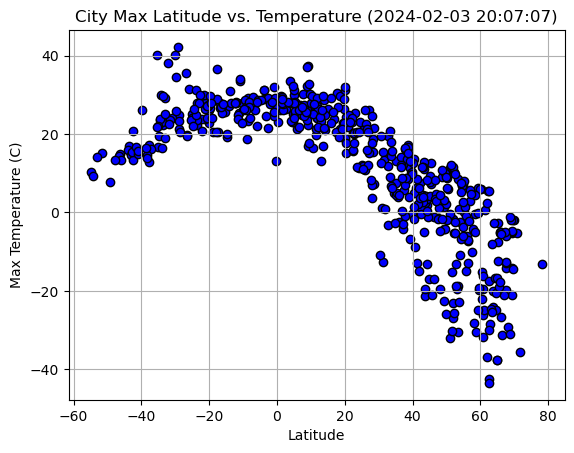

In [95]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolor='b', edgecolors='k')
#import datetime
# Incorporate the other graph properties
 
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
date=city_data_df['Date'].min()
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

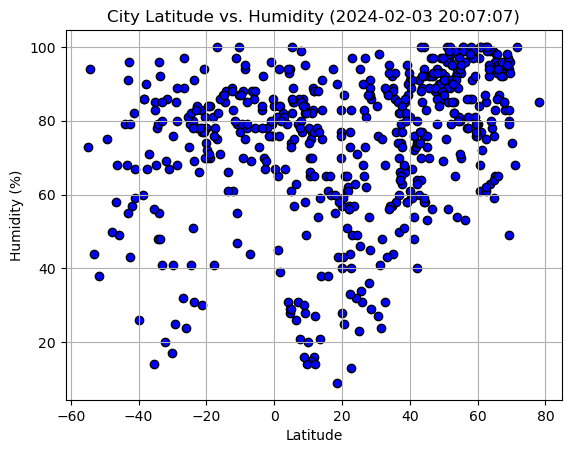

In [96]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', facecolor='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Humidity ({date})")
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

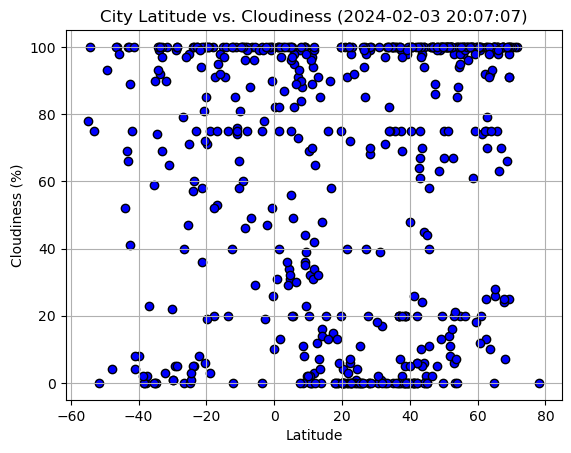

In [97]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', facecolor='b', edgecolors='k')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

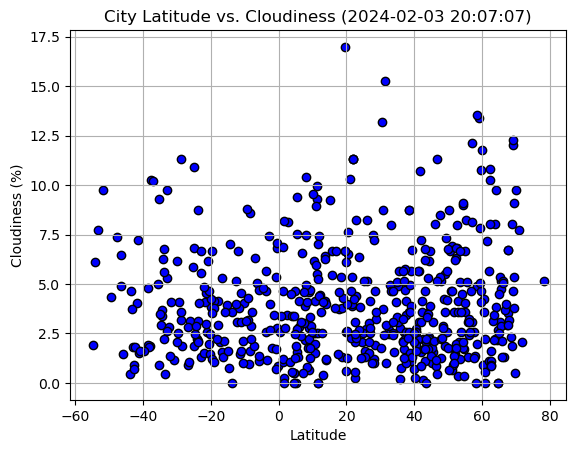

In [98]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', facecolor='b', edgecolors='k')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [111]:
#! pip install matplotlib seaborn

In [132]:
# Define a function to create Linear Regression plots
def linear_regress_plot(x, y, x_label, y_label, title):

    data = {'X': x, 'Y': y}
    df = pd.DataFrame(data)
    
    slope, intercept, r_value, pvalue, stderr = st.linregress(x, y)
    regression_line = slope * x + intercept
    #print(type(regression_line))
    #print(x, regression_line)
    line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

    plt.scatter(x, y, color='blue')
    plt.plot(x, regression_line, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print('INTERCEPT', intercept)
    print('SLOPE', slope)
    print('RVALUE', r_value)
    return round(slope, 2), round(intercept, 2)

In [133]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brooks,50.5834,-111.8851,5.99,75,100,6.69,CA,2024-02-03 20:15:02
1,san carlos del zulia,9.0000,-71.9135,32.23,58,100,4.60,VE,2024-02-03 20:19:29
4,albany,42.6001,-73.9662,3.36,60,64,2.24,US,2024-02-03 20:09:25
8,la ronge,55.1001,-105.2842,0.14,93,100,3.60,CA,2024-02-03 20:19:30
9,bethel,41.3712,-73.4140,5.17,54,0,3.09,US,2024-02-03 20:12:02


In [134]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ballina,-28.8667,153.5667,24.88,85,99,3.19,AU,2024-02-03 20:19:29
3,avarua,-21.2078,-159.7750,28.03,78,36,2.57,CK,2024-02-03 20:12:09
5,adamstown,-25.0660,-130.1015,24.99,73,98,1.88,PN,2024-02-03 20:12:01
6,bowen,-20.0167,148.2333,26.11,74,100,3.83,AU,2024-02-03 20:12:42
7,blackmans bay,-43.0167,147.3167,14.85,91,100,1.83,AU,2024-02-03 20:11:59


#  Temperature vs. Latitude Linear Regression Plot

INTERCEPT 33.55440966527811
SLOPE -0.7256293860497723
RVALUE -0.8433914317071901


Text(0.5, -5.5, 'y = -0.73x + 33.55')

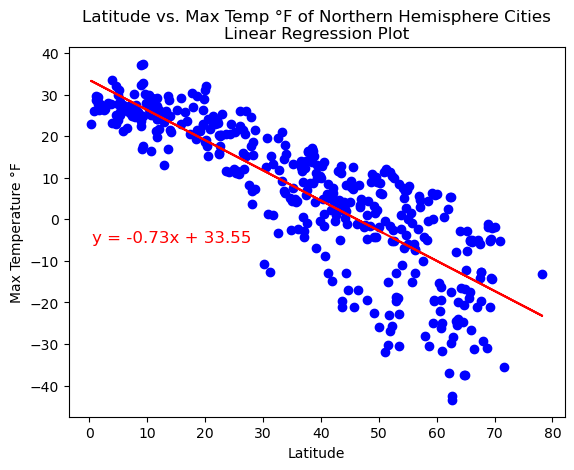

In [135]:
# Linear regression on Northern Hemisphere
slope, intercept = linear_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Latitude', 'Max Temperature °F', 'Latitude vs. Max Temp °F of Northern Hemisphere Cities\nLinear Regression Plot')

plt.text(0.5, -5.5, f'y = {slope}x + {intercept}', fontsize=12, color='red')

INTERCEPT 29.955900864942635
SLOPE 0.2510377580115496
RVALUE 0.5579552939390043


Text(-20, 10, 'y = 0.25x + 29.96')

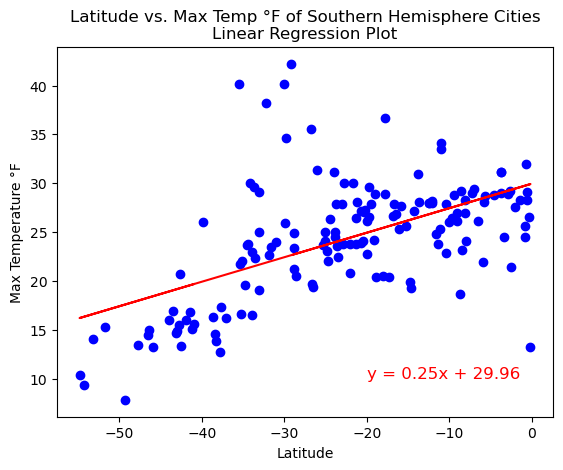

In [136]:
# Linear regression on Southern Hemisphere
slope, intercept = linear_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Latitude', 'Max Temperature °F', 'Latitude vs. Max Temp °F of Southern Hemisphere Cities\nLinear Regression Plot')
plt.text(-20, 10, f'y = {slope}x + {intercept}', fontsize=12, color='red')

**Discussion about the linear relationship:** In reveiwing both linear regression plots for Northern and Southern Hemispheres based on latitude vs. temperature, they both show that as it moves closer to the equator the temperature goes up. There is a correlation between the rise in temperature as it moves closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

INTERCEPT 58.65278774255066
SLOPE 0.43464526958254146
RVALUE 0.42575246278026585


Text(50, 40, 'y = 0.43x + 58.65')

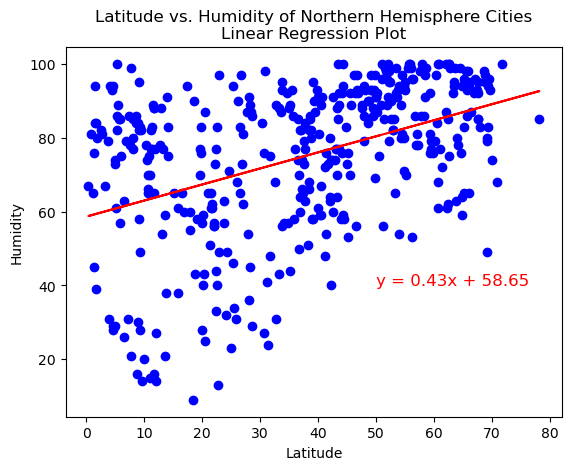

In [137]:
# Northern Hemisphere
slope, intercept = linear_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Latitude', 'Humidity', 'Latitude vs. Humidity of Northern Hemisphere Cities\nLinear Regression Plot')
plt.text(50, 40, f'y = {slope}x + {intercept}', fontsize=12, color='red')

INTERCEPT 81.54245918663452
SLOPE 0.39916261380059914
RVALUE 0.30143077805345986


Text(-20, 30, 'y = 0.4x + 81.54')

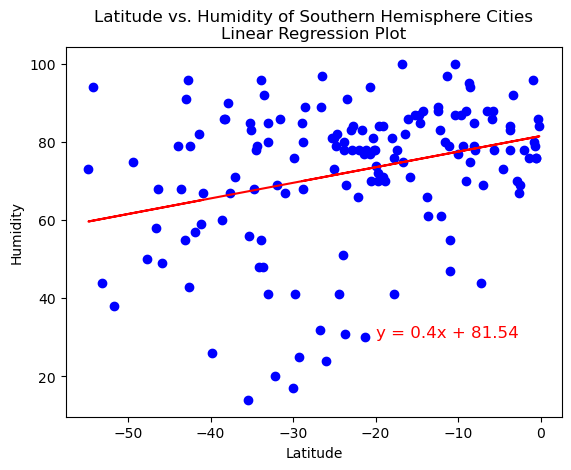

In [138]:
# Southern Hemisphere
slope, intercept = linear_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Latitude', 'Humidity', 'Latitude vs. Humidity of Southern Hemisphere Cities\nLinear Regression Plot')
plt.text(-20, 30, f'y = {slope}x + {intercept}', fontsize=12, color='red')

**Discussion about the linear relationship:** In reveiwing both linear regression plots for Northern and Southern Hemispheres based on latitude vs. humidity, there doesn't seem to be a direct correlation between the two.  There are other factors that impact humidity.

### Cloudiness vs. Latitude Linear Regression Plot

INTERCEPT 41.079897035320705
SLOPE 0.48919765708430385
RVALUE 0.23649149137949557


Text(50, 45, 'y = 0.49x + 41.08')

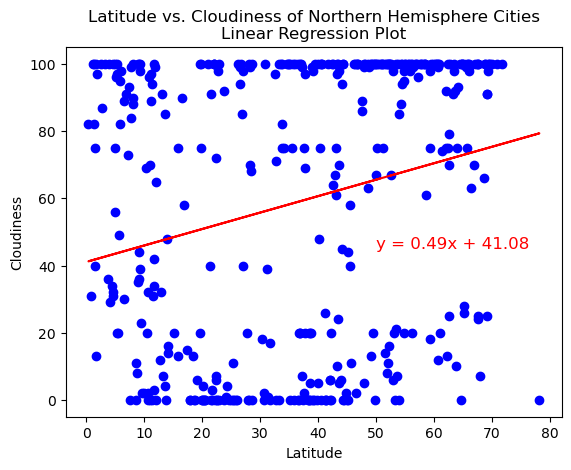

In [139]:
# Northern Hemisphere
slope, intercept = linear_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness', 'Latitude vs. Cloudiness of Northern Hemisphere Cities\nLinear Regression Plot')
plt.text(50, 45, f'y = {slope}x + {intercept}', fontsize=12, color='red')

INTERCEPT 76.8557631098132
SLOPE 0.5046106765711823
RVALUE 0.1847844123346725


Text(-50, 30, 'y = 0.5x + 76.86')

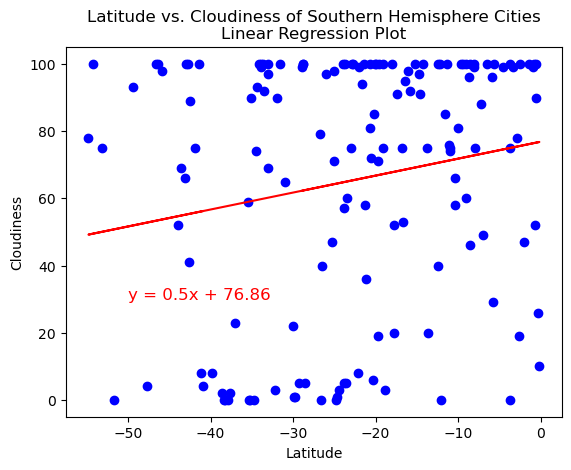

In [140]:
# Southern Hemisphere
slope, intercept = linear_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness', 'Latitude vs. Cloudiness of Southern Hemisphere Cities\nLinear Regression Plot')
plt.text(-50, 30, f'y = {slope}x + {intercept}', fontsize=12, color='red')

**Discussion about the linear relationship:** In reveiwing both linear regression plots for Northern and Southern Hemispheres based on latitude vs. cloudiness, there doesn't seem to be a direct correlation between the two.  

### Wind Speed vs. Latitude Linear Regression Plot

INTERCEPT 3.6576816016596387
SLOPE 0.008683838793279977
RVALUE 0.059999244066062545


Text(10, 12, 'y = 0.01x + 3.66')

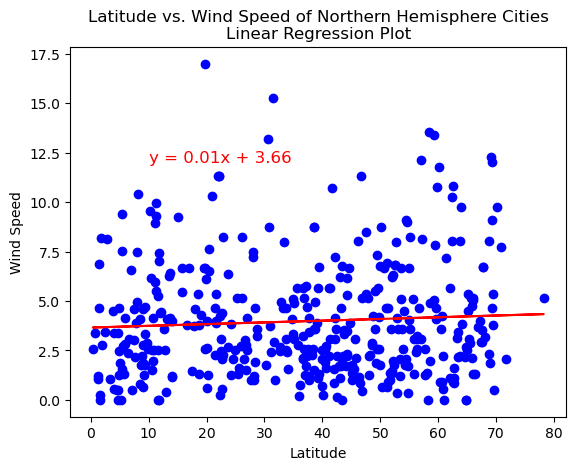

In [141]:
# Northern Hemisphere
slope, intercept = linear_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed', 'Latitude vs. Wind Speed of Northern Hemisphere Cities\nLinear Regression Plot')
plt.text(10, 12, f'y = {slope}x + {intercept}', fontsize=12, color='red')

INTERCEPT 3.29321041518242
SLOPE -0.019952135676424166
RVALUE -0.11324749326058164


Text(-50, 8, 'y = -0.02x + 3.29')

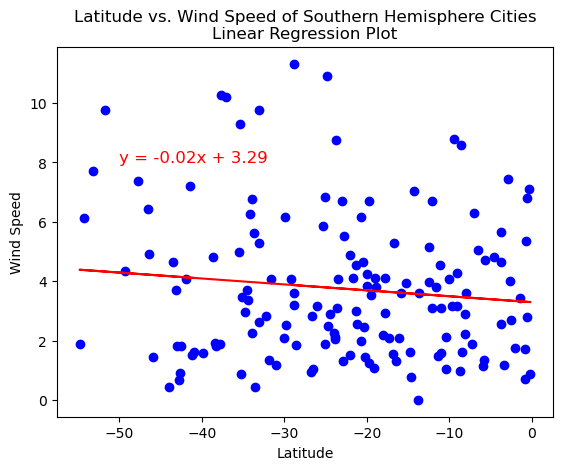

In [142]:
# Southern Hemisphere
slope, intercept = linear_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed', 'Latitude vs. Wind Speed of Southern Hemisphere Cities\nLinear Regression Plot')
plt.text(-50, 8, f'y = {slope}x + {intercept}', fontsize=12, color='red')

**Discussion about the linear relationship:** In reveiwing both linear regression plots for Northern and Southern Hemispheres based on latitude vs. wind speed, there doesn't seem to be a correlation between the two.